In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


## 1. DatetimeIndex에 'MS'의 frequency를 할당합니다.

In [2]:
df.index.freq = 'MS'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [7]:
df

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


## 2. dataset Plot

<AxesSubplot: xlabel='DATE'>

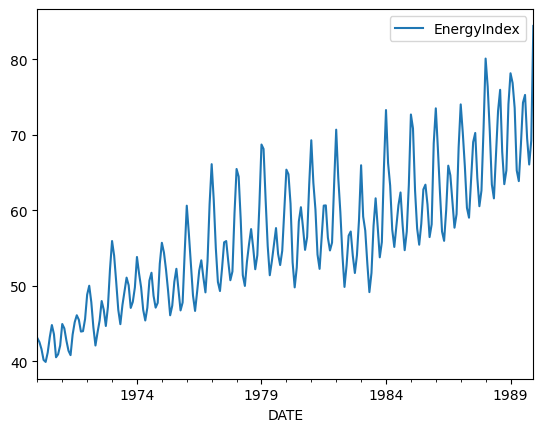

In [5]:
df.plot()

## 3. Simple Moving Average
- Add a column (12-month Simple Moving Average[SMA])
- Plotting

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

model = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level = alpha, optimized=False)
df['SES12'] = model.fittedvalues.shift(-1)
df

,EnergyIndex,SES12
DATE,,
1970-01-01,43.0869,43.086900
1970-02-01,42.5577,43.005485
1970-03-01,41.6215,42.792564
1970-04-01,40.1982,42.393431
1970-05-01,39.9321,42.014765
...,...,...
1989-08-01,75.2704,70.950641
1989-09-01,69.5107,70.729112
1989-10-01,66.0620,70.011095


<AxesSubplot: xlabel='DATE'>

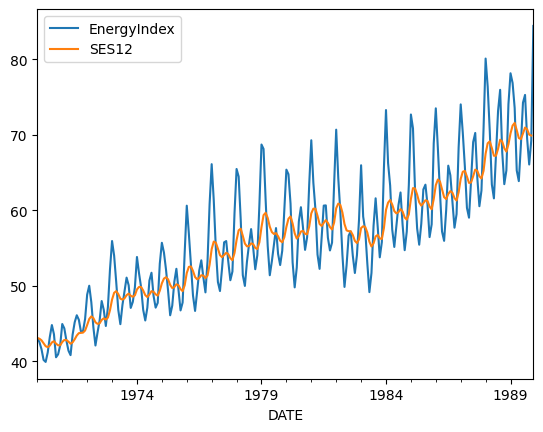

In [10]:
df.plot()

## 4. Exponentially Weighted Moving Average
- tatsmodels SimpleExpSmoothing을 사용하여 span이 12인 Exponentially Weighted Moving Average(EWMA)을 표시하는 column을 추가
- Plotting

In [11]:
df['EWMA12'] = df['EnergyIndex'].ewm(span = 12, adjust = False).mean()

<AxesSubplot: xlabel='DATE'>

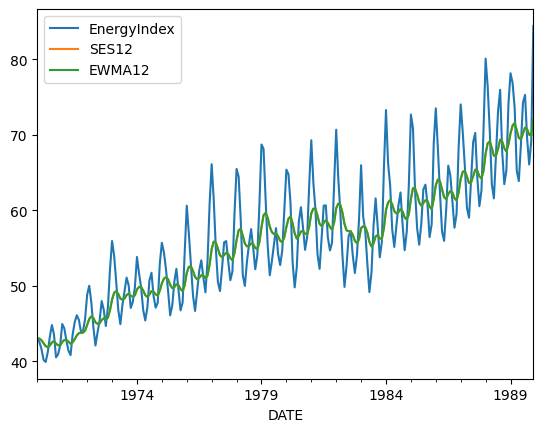

In [12]:
df.plot()

# 5. Triple Exponential Smoothing(multiplicative)
- Triple Exponential Smoothing을 사용하여 Column으로 DataFrame에 추가합니다.
- Plotting

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESadd'] = model = ExponentialSmoothing(df['EnergyIndex'], trend = 'add', seasonal = 'add').fit().fittedvalues 
df

,EnergyIndex,SES12,EWMA12,TESadd
DATE,,,,
1970-01-01,43.0869,43.086900,43.086900,43.278788
1970-02-01,42.5577,43.005485,43.005485,41.795493
1970-03-01,41.6215,42.792564,42.792564,40.062201
1970-04-01,40.1982,42.393431,42.393431,38.738853
1970-05-01,39.9321,42.014765,42.014765,38.954996
...,...,...,...,...
1989-08-01,75.2704,70.950641,70.950641,74.858636
1989-09-01,69.5107,70.729112,70.729112,67.715392
1989-10-01,66.0620,70.011095,70.011095,64.941451


<AxesSubplot: xlabel='DATE'>

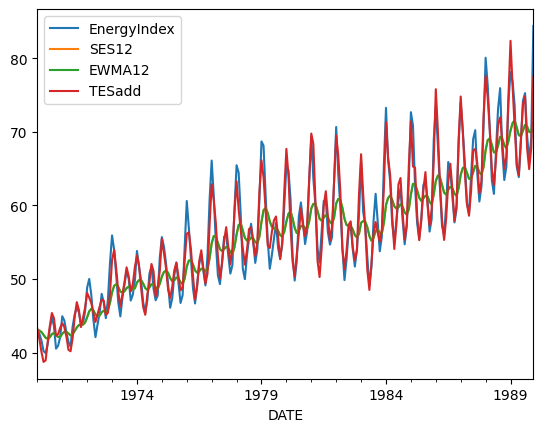

In [15]:
df.plot()